# 2. 자연어와 단어의 분산 표현

## 2.1 자연어 처리란
사람이 평소에 쓰는 말을 자연어(Natural Language)라고 한다.  
자연어 처리(Natural Language Processing, NLP)를 문자 그대로 해석하면 자연어를 처리하는 분야라고 말한다.

## 2.1.1 단어의 의미
컴퓨터에게 '단어의 의미'를 이해시키는 방법에는 크게 3가지 기법이 있다.  
1. 시소러스를 활용한 기법  
2. 통계 기반 기법  
3. 추론 기반 기법

## 2.2 시소러스
시소러스 방식은 단어의 의미를 직접적으로 나타내는 사전과 같은 방식이 아닌 유의어 사전으로, 뜻이 같은단어(동의어)나 뜻이 비슷한단어(유의어)로 구성되어 있다

## 2.2.1 WordNet
자연어 처리 분야에서 가장 유명한 시소러스는 WordNet이다.  
WordNet은 프린스턴 대학교에서 1985년부터 구축한 시소러스로 지금까지 많은 연구와 다양한 자연어 처리 애플리케이션에서 활용되고 있다.  


## 2.2.2 시소러스의 문제점
WordNet과 같은 시소러스에는 수많은 단어에 대한 동의어와 계층 구조 등의 관계가 정의되어 있는데, 사람이 수작업으로 레이블링 하는 방식에는 큰 결점이 존재한다.  
#### 시대 변화에 대응하기 어렵다.  
단어의 뜻은 새로 생기거나 없어지기 때문에 시소러스의 문제 중 하나이다.  
#### 사람을 쓰는 비용이 크다.  
단어들 모두에 대해 단어 사이의 관계를 정의 해주어야 하는데 영어의 경우 한 단어에 비슷한 뜻은 약 1000만개 정도 된다.  
#### 단어의 미묘한 차이를 표현할 수 없다.  
비슷한 단어끼리 묶여있지만 비슷한 단어라도 미묘한 차이가 있는데 이 차이를 표현할 수 없다.  

시소러스의 문제를 해결하기 위해 통계 기반 기법과 신경망을 사용한 추론 기반 기법을 활용하면 단어의 의미를 자동으로 추출한다.  

## 2.3 통계 기반 기법
통계 기반 기법은 말뭉치(corpus 복수형, 단수 corpora)를 이용한다.

## 2.3.1 파이썬으로 말뭉치 전처리 하기
#### 1. Preprocessing
텍스트 데이터를 단어로 분할하고 그 분할된 단어들을 단어 ID목록으로 변환한다.

In [3]:
text = 'You say goodbye and I say hello.'

text = text.lower()
text = text.replace('.', ' .')
text

'you say goodbye and i say hello .'

In [4]:
words = text.split(' ')
words

['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']

단어에 ID를 부여하고, ID의 리스트로 이용가능하게 해준다.(딕셔너리 사용)

In [5]:
word_to_id = {}

for word in words:
    if word not in word_to_id:
        new_id =  len(word_to_id)
        word_to_id[word] = new_id
        
id_to_word = {id_: word for word, id_ in word_to_id.items()}

In [6]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

In [7]:
word_to_id

{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}

In [8]:
id_to_word[1]

'say'

In [9]:
word_to_id['hello']

5

In [10]:
# 단어 목록 -> 단어 ID 목록으로 변경
import numpy as np

corpus = [word_to_id[word] for word in words]
corpus = np.array(corpus)
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [14]:
def preprocess(text):
    text = text.lower()
    text = text.replace('.', ' .')
    words = text.split(' ')

    word_to_id = {}
    for word in words:
        if word not in word_to_id:
            new_id =  len(word_to_id)
            word_to_id[word] = new_id
            
    id_to_word = {id_: word for word, id_ in word_to_id.items()}
    
    corpus = np.array([word_to_id[word] for word in words])
    return corpus, word_to_id, id_to_word

In [15]:
# common/util.py -> preprocess 메서드 사용
import sys
sys.path.append('..')
from common.util import preprocess

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

In [16]:
corpus, word_to_id, id_to_word

(array([0, 1, 2, 3, 4, 1, 5, 6]),
 {'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6},
 {0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'})

## 2.3.2 단어의 분산표현
단어의 의미를 정확하게 파악할 수 있는 벡터 표현을 자연어 처리 분야에서는 단어의 분산표현(distributional representation)이라고 한다.

## 2.3.3 분포 가설
단어의 의미는 주변단어에 의해 형성된다라는 것이 분포 가설(distributional hypothesis)라고 하며, 단어를 벡터로 표현하는 최근 연구도 대부분 이 가설에 기초한다.

##  2.3.4 동시발생 행렬(Co-occurrence Matrix)
주변 단어를 세어 보는 방법  
특정 단어에 대해, 그 단어의 주변에 어떤 단어가 몇 번이나 등장하는지 카운팅하여 합치는 방법

In [19]:
import sys
sys.path.append('..')
import numpy as np
from common.util import preprocess

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

print(f'corpus: {corpus}')
print(f'id_to_word: {id_to_word}')

corpus: [0 1 2 3 4 1 5 6]
id_to_word: {0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [20]:
C = np.array([[0, 1, 0, 0, 0, 0, 0], 
              [1, 0, 1, 0, 1, 1, 0], 
              [0, 1, 0, 1, 0, 0, 0], 
              [0, 0, 1, 0, 1, 0, 0], 
              [0, 1, 0, 1, 0, 0, 0], 
              [0, 1, 0, 0, 0, 0, 1], 
              [0, 0, 0, 0, 0, 1, 0]], dtype=np.int32)

In [21]:
# ID가 0인 단어의 벡터 표현
print(C[0])
# ID가 4인 단어의 벡터 표현
print(C[4])

# "goodbye"의 벡터 표현
print(C[word_to_id['goodbye']])

[0 1 0 0 0 0 0]
[0 1 0 1 0 0 0]
[0 1 0 1 0 0 0]


In [22]:
# common/util.py
def create_co_matrix(corpus, vocab_size, window_size=1):
    corpus_size = len(corpus)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)
    
    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size + 1):
            left_idx = idx - i  # left window_size
            right_idx = idx + i  # right window_size

            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1

            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1
                
    return co_matrix

In [23]:
window_size = 1
vocab_size = len(id_to_word)

C = create_co_matrix(corpus, vocab_size, window_size=1)
C

array([[0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0]])

## 2.3.5 벡터 간 유사도
벡터 사이의 유사도를 측정하는 방법은 다양한데, 대표적으로 벡터의 내적이나 유클리드 거리 등을 꼽을 수 있다.  
단어 벡터의 유사도를 나타낼 때는 코사인유사도(cosine similarity)를 자주 이용한다.  
두방향이 완전히 같다면 1을 나타내고, 정 반대이면 -1을 나타낸다.

- 두 벡터 $\mathbf{x} = (x_1, x_2, \dots, x_n)$과 $\mathbf{y}=(y_1, y_2, \dots, y_n)$ 에 대하여 코사인 유사도는 다음과 같다.
$$
\text{similarity}(\mathbf{x}, \mathbf{y}) = \frac{\mathbf{x} \cdot \mathbf{y}}{\| \mathbf{x} \| \| \mathbf{y} \|} = \frac{x_1 y_1 + \cdots + x_n y_n}{\sqrt{x_{1}^{2} + \cdots + x_n^{2}} \sqrt{y_1^{2} + \cdots + y_n^{2}}}
$$

In [2]:
def cos_similarity(x, y, eps=1e-8):
    # epsilon 값을 추가해, 
    # 0으로 나누기 오류가 나는 것을 막아줌 epsilon으로 아주 작은 수를 더해 에러를 막는다.
    nx = x / np.sqrt(np.sum(x**2) + eps)  # x의 정규화
    ny = y / np.sqrt(np.sum(y**2) + eps)  # y의 정규화
    return np.dot(nx, ny)

In [3]:
import sys
sys.path.append('..')
from common.util import preprocess, create_co_matrix, cos_similarity

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

c0 = C[word_to_id['you']]  # "you"의 단어 벡터
c1 = C[word_to_id['i']]  # 'i'의 단어 벡터
print(cos_similarity(c0, c1))

0.7071067758832467


## 2.3.6 유사 단어의 랭킹 표시

In [6]:
import numpy as np
def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
    # 1) 검색어를 꺼낸다.
    if query not in word_to_id:
        print(f'{query}(을)를 찾을 수 없습니다.')
        return 
    
    print(f'\n[query] {query}')
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]
    
    # 2) 코사인 유사도 계산
    vocab_size = len(id_to_word)
    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec)
        
    # 3) 코사인 유사도를 기준으로 내림차순으로 출력
    count = 0
    for i in (-1 * similarity).argsort():
        if id_to_word[i] == query:
            continue
        print(f' {id_to_word[i]}: {similarity[i]}')
        
        count +=1
        if count >= top:
            return

In [7]:
# 오름차순
x = np.array([100, -20, 2])
x.argsort()

# 내림차순
(-x).argsort()

array([0, 2, 1], dtype=int64)

In [8]:
import sys
sys.path.append('..')
from common.util import preprocess, create_co_matrix, most_similar

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

most_similar('you', word_to_id, id_to_word, C, top=5)


[query] you
 goodbye: 0.7071067758832467
 i: 0.7071067758832467
 hello: 0.7071067758832467
 say: 0.0
 and: 0.0


## 2.4 통계 기반 기법 개선하기

## 2.4.1 상호정보량 (Pointwise Mutual Information)
Corpus에서 `the`와 `car`의 동시발생(co-occurrence)를 보면, `the`와 `car`의 관련성 보다 `car`와 `drive`의 관련성이 더 높지만, 동시발생 횟수로만 본다면 `the`와 `car`의 관련성이 높게 나타난다.  
이러한 문제를 해결하기 위해 **점별 상호정보량**(PMI, Pointwise Mutual Information)을 사용한다. PMI는 두 확률변수 $x$와 $y$에 대해 다음의 식처럼 정의 된다.

$$
\text{PMI} (x, y) = \log_{2}{\frac{P(x,y)}{P(x)P(y)}}
$$

- $P(x)$ : $x$가 일어날 확률
- $P(y)$ : $y$가 일어날 확률
- $P(x,y)$ : $x$와 $y$가 동시에 일어날 확률
PMI값이 높을 수록 관련성이 높다는 의미이다.

Co-occurrence Matrix를 이용해 다시 써보면,

$$
\text{PMI}(x, y) = \log_{2}{\frac{P(x,y)}{P(x)P(y)}}
= \log_{2}{\frac{\frac{C(x,y)}{N}}{\frac{C(x)}{N} \frac{C(y)}{N}}}
= \log_{2}{\frac{C(x,y)\cdot N}{C(x)C(y)}}
$$

- $C$ : Co-occurrence Matrix
- $C(x,y)$ : 단어 $x$와 $y$가 동시발생하는 횟수
- $C(x), C(y)$ : $x$와 $y$의 등장횟수
- $N$ : Corpus에 포함된 단어 수

만약, 두 안어의 동시발생 횟수가 $0$일 경우, $\log_{2}{0} = -\infty$ 가 되는 문제가 발생한다. 이를 피하기 위해 **양의 상호정보량**(PPMI, Positive PMI)를 사용한다.

In [9]:
def ppmi(C, verbose=False, eps=1e-8):
    '''PPMI(점별 상호정보량) 생성
    :param C: 동시발생 행렬
    :param verbose: 진행 상황을 출력할지 여부
    :return: ppmi
    '''
    M = np.zeros_like(C, dtype=np.float32)
    N = np.sum(C)  # num of corpus
    S = np.sum(C, axis=0)  # 각 단어의 출현 횟수
    total = C.shape[0] * C.shape[1]
    cnt = 0
    
    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            pmi = np.log2(C[i, j] * N / (S[i]*S[j]) + eps)
            M[i, j] = max(0, pmi)
            
            if verbose:
                cnt += 1
                if cnt % (total//100) == 0:
                    print(f'{(100*cnt/total):.2f} 완료')
    return M

In [10]:
import sys
sys.path.append('..')
import numpy as np
from common.util import preprocess, create_co_matrix, cos_similarity, ppmi

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

np.set_printoptions(precision=3)  # 유효 자릿수를 세 자리로 표시
print('Co-occurrence Matrix')
print(C)
print('-'*50)
print('PPMI')
print(W)

Co-occurrence Matrix
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


In [11]:
from common.util import most_similar
most_similar('you', word_to_id, id_to_word, W, top=5)


[query] you
 goodbye: 0.40786147117614746
 i: 0.40786147117614746
 hello: 0.2763834297657013
 say: 0.0
 and: 0.0


## 2.4.2 차원감소
차원감소(dimensionality reduction)는 문자 그대로 벡터의 차원을 줄이는 방법을 말합니다.  
'중요한 정보'는 최대한 유지하면서 줄이는게 핵심이다.  

#### 특이값분해(SVD, Singular Value Decomposition)


$$
\mathbf{X} = \mathbf{U \Sigma V}^{T}
$$

$\mathbf{U}$는 직교행렬이며, 그 열벡터는 서로 직교한다. 이러한 직교행렬은 어떠한 공간의 축(기저)을 형성한다. 따라서 이러한 $\mathbf{U}$행렬을 '단어 공간'이라고 취급할 수 있다. 

$\mathbf{\Sigma}$는 대각행렬이며, 특이값(singular value)이 큰 순서로 나열되어 있다. 특이값이란, '해당 축'의 중요도라고 볼 수 있으며, 이 특이값을 기준으로 덜 중요한 축을 제외할 수 있다.

## 2.4.3 SVD에 의한 차원 축소

In [15]:
# count_method_small.py
%matplotlib inline
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from common.util import preprocess, create_co_matrix, ppmi


text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

# SVD
U, S, V = np.linalg.svd(W)

In [16]:
print(C[0])  # 동시발생 행렬
print(W[0])  # PPMI 행렬
print(U[0])  # SVD
# 2차원으로 차원 축소하기
print(U[0, :2])

[0 1 0 0 0 0 0]
[0.    1.807 0.    0.    0.    0.    0.   ]
[ 0.000e+00  3.409e-01 -1.205e-01 -3.331e-16 -1.110e-16 -9.323e-01
 -2.426e-17]
[0.    0.341]


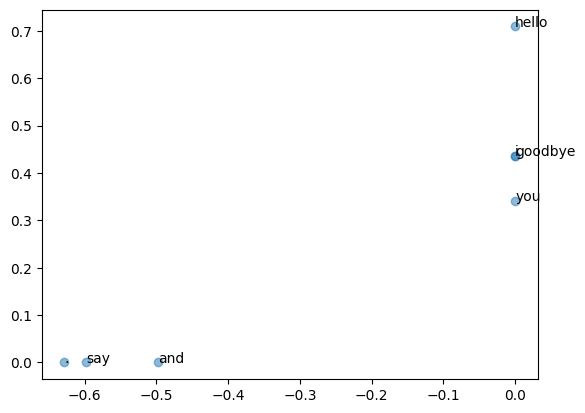

In [17]:
# 플롯
for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))
plt.scatter(U[:,0], U[:,1], alpha=0.5)
plt.show()

## 2.4.4 PTB 데이터셋

**펜 트리뱅크**(PTB, Penn Treebank) 데이터셋이며, PTB 말뭉치는 주어진 기법의 품질을 측정하는 벤치마크로 자주 이용된다.

In [18]:
# chap02/show_ptb.py
import sys
sys.path.append('..')
from dataset import ptb


corpus, word_to_id, id_to_word = ptb.load_data('train')

print('말뭉치 크기:', len(corpus))
print('corpus[:30]:', corpus[:30])
print()
print('id_to_word[0]:', id_to_word[0])
print('id_to_word[1]:', id_to_word[1])
print('id_to_word[2]:', id_to_word[2])
print()
print("word_to_id['car']:", word_to_id['car'])
print("word_to_id['happy']:", word_to_id['happy'])
print("word_to_id['lexus']:", word_to_id['lexus'])

말뭉치 크기: 929589
corpus[:30]: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

id_to_word[0]: aer
id_to_word[1]: banknote
id_to_word[2]: berlitz

word_to_id['car']: 3856
word_to_id['happy']: 4428
word_to_id['lexus']: 7426


## 2.4.5 PTB 데이터셋 평가

In [19]:
# chap02/count_method_big.py
import sys
sys.path.append('..')
import numpy as np
from common.util import most_similar, create_co_matrix, ppmi
from dataset import ptb

window_size = 2
wordvec_size = 100

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
print('Create Co-occurrence Matrix...')
C = create_co_matrix(corpus, vocab_size, window_size)

Create Co-occurrence Matrix...


In [20]:
print('PPMI 계산...')
W = ppmi(C, verbose=True)

PPMI 계산...


C:\Users\JM\PycharmProjects\DLFromScratch2ByPB\common\util.py:134: RuntimeWarning: overflow encountered in scalar multiply
  pmi = np.log2(C[i, j] * N / (S[i]*S[j]) + eps)
C:\Users\JM\PycharmProjects\DLFromScratch2ByPB\common\util.py:134: RuntimeWarning: invalid value encountered in log2
  pmi = np.log2(C[i, j] * N / (S[i]*S[j]) + eps)


1.00 완료
2.00 완료
3.00 완료
4.00 완료
5.00 완료
6.00 완료
7.00 완료
8.00 완료
9.00 완료
10.00 완료
11.00 완료
12.00 완료
13.00 완료
14.00 완료
15.00 완료
16.00 완료
17.00 완료
18.00 완료
19.00 완료
20.00 완료
21.00 완료
22.00 완료
23.00 완료
24.00 완료
25.00 완료
26.00 완료
27.00 완료
28.00 완료
29.00 완료
30.00 완료
31.00 완료
32.00 완료
33.00 완료
34.00 완료
35.00 완료
36.00 완료
37.00 완료
38.00 완료
39.00 완료
40.00 완료
41.00 완료
42.00 완료
43.00 완료
44.00 완료
45.00 완료
46.00 완료
47.00 완료
48.00 완료
49.00 완료
50.00 완료
51.00 완료
52.00 완료
53.00 완료
54.00 완료
55.00 완료
56.00 완료
57.00 완료
58.00 완료
59.00 완료
60.00 완료
61.00 완료
62.00 완료
63.00 완료
64.00 완료
65.00 완료
66.00 완료
67.00 완료
68.00 완료
69.00 완료
70.00 완료
71.00 완료
72.00 완료
73.00 완료
74.00 완료
75.00 완료
76.00 완료
77.00 완료
78.00 완료
79.00 완료
80.00 완료
81.00 완료
82.00 완료
83.00 완료
84.00 완료
85.00 완료
86.00 완료
87.00 완료
88.00 완료
89.00 완료
90.00 완료
91.00 완료
92.00 완료
93.00 완료
94.00 완료
95.00 완료
96.00 완료
97.00 완료
98.00 완료
99.00 완료
100.00 완료


In [21]:
try:
    # truncated SVD
    from sklearn.utils.extmath import randomized_svd
    U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5,
                             random_state=None)
except:
    # SVD
    U, S, V = np.linalg.svd(W)

    
word_vecs = U[:, :wordvec_size]
querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)


[query] you
 i: 0.6997091770172119
 we: 0.6871196031570435
 do: 0.5874743461608887
 've: 0.546515166759491
 anybody: 0.5175361633300781

[query] year
 month: 0.677654504776001
 earlier: 0.642075777053833
 quarter: 0.624756395816803
 last: 0.5966360569000244
 next: 0.5845872759819031

[query] car
 luxury: 0.6044373512268066
 auto: 0.5927863121032715
 truck: 0.5336396098136902
 midsized: 0.5286904573440552
 corsica: 0.513054370880127

[query] toyota
 motor: 0.7333644032478333
 nissan: 0.6599500179290771
 motors: 0.6438850164413452
 lexus: 0.6222871541976929
 honda: 0.6106952428817749


In [22]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(U[1000:1100,:])

In [23]:
vocab = list(id_to_word.values())

In [24]:
df = pd.DataFrame(X_tsne, index=vocab[1000:1100], columns=['x', 'y'])
df.shape

(100, 2)

In [25]:
df.head(10)

,x,y
dec.,-0.927747,-2.737128
ruling,-1.774405,-1.140494
slash,1.178821,-1.208920
earnings,3.532516,-1.650498
spokesman,2.801231,-0.600097
tracking,1.140704,-0.665761
whose,3.470460,-0.762316
addresses,1.210022,-0.938436
changed,0.102674,-2.179918
past,2.266230,0.641756


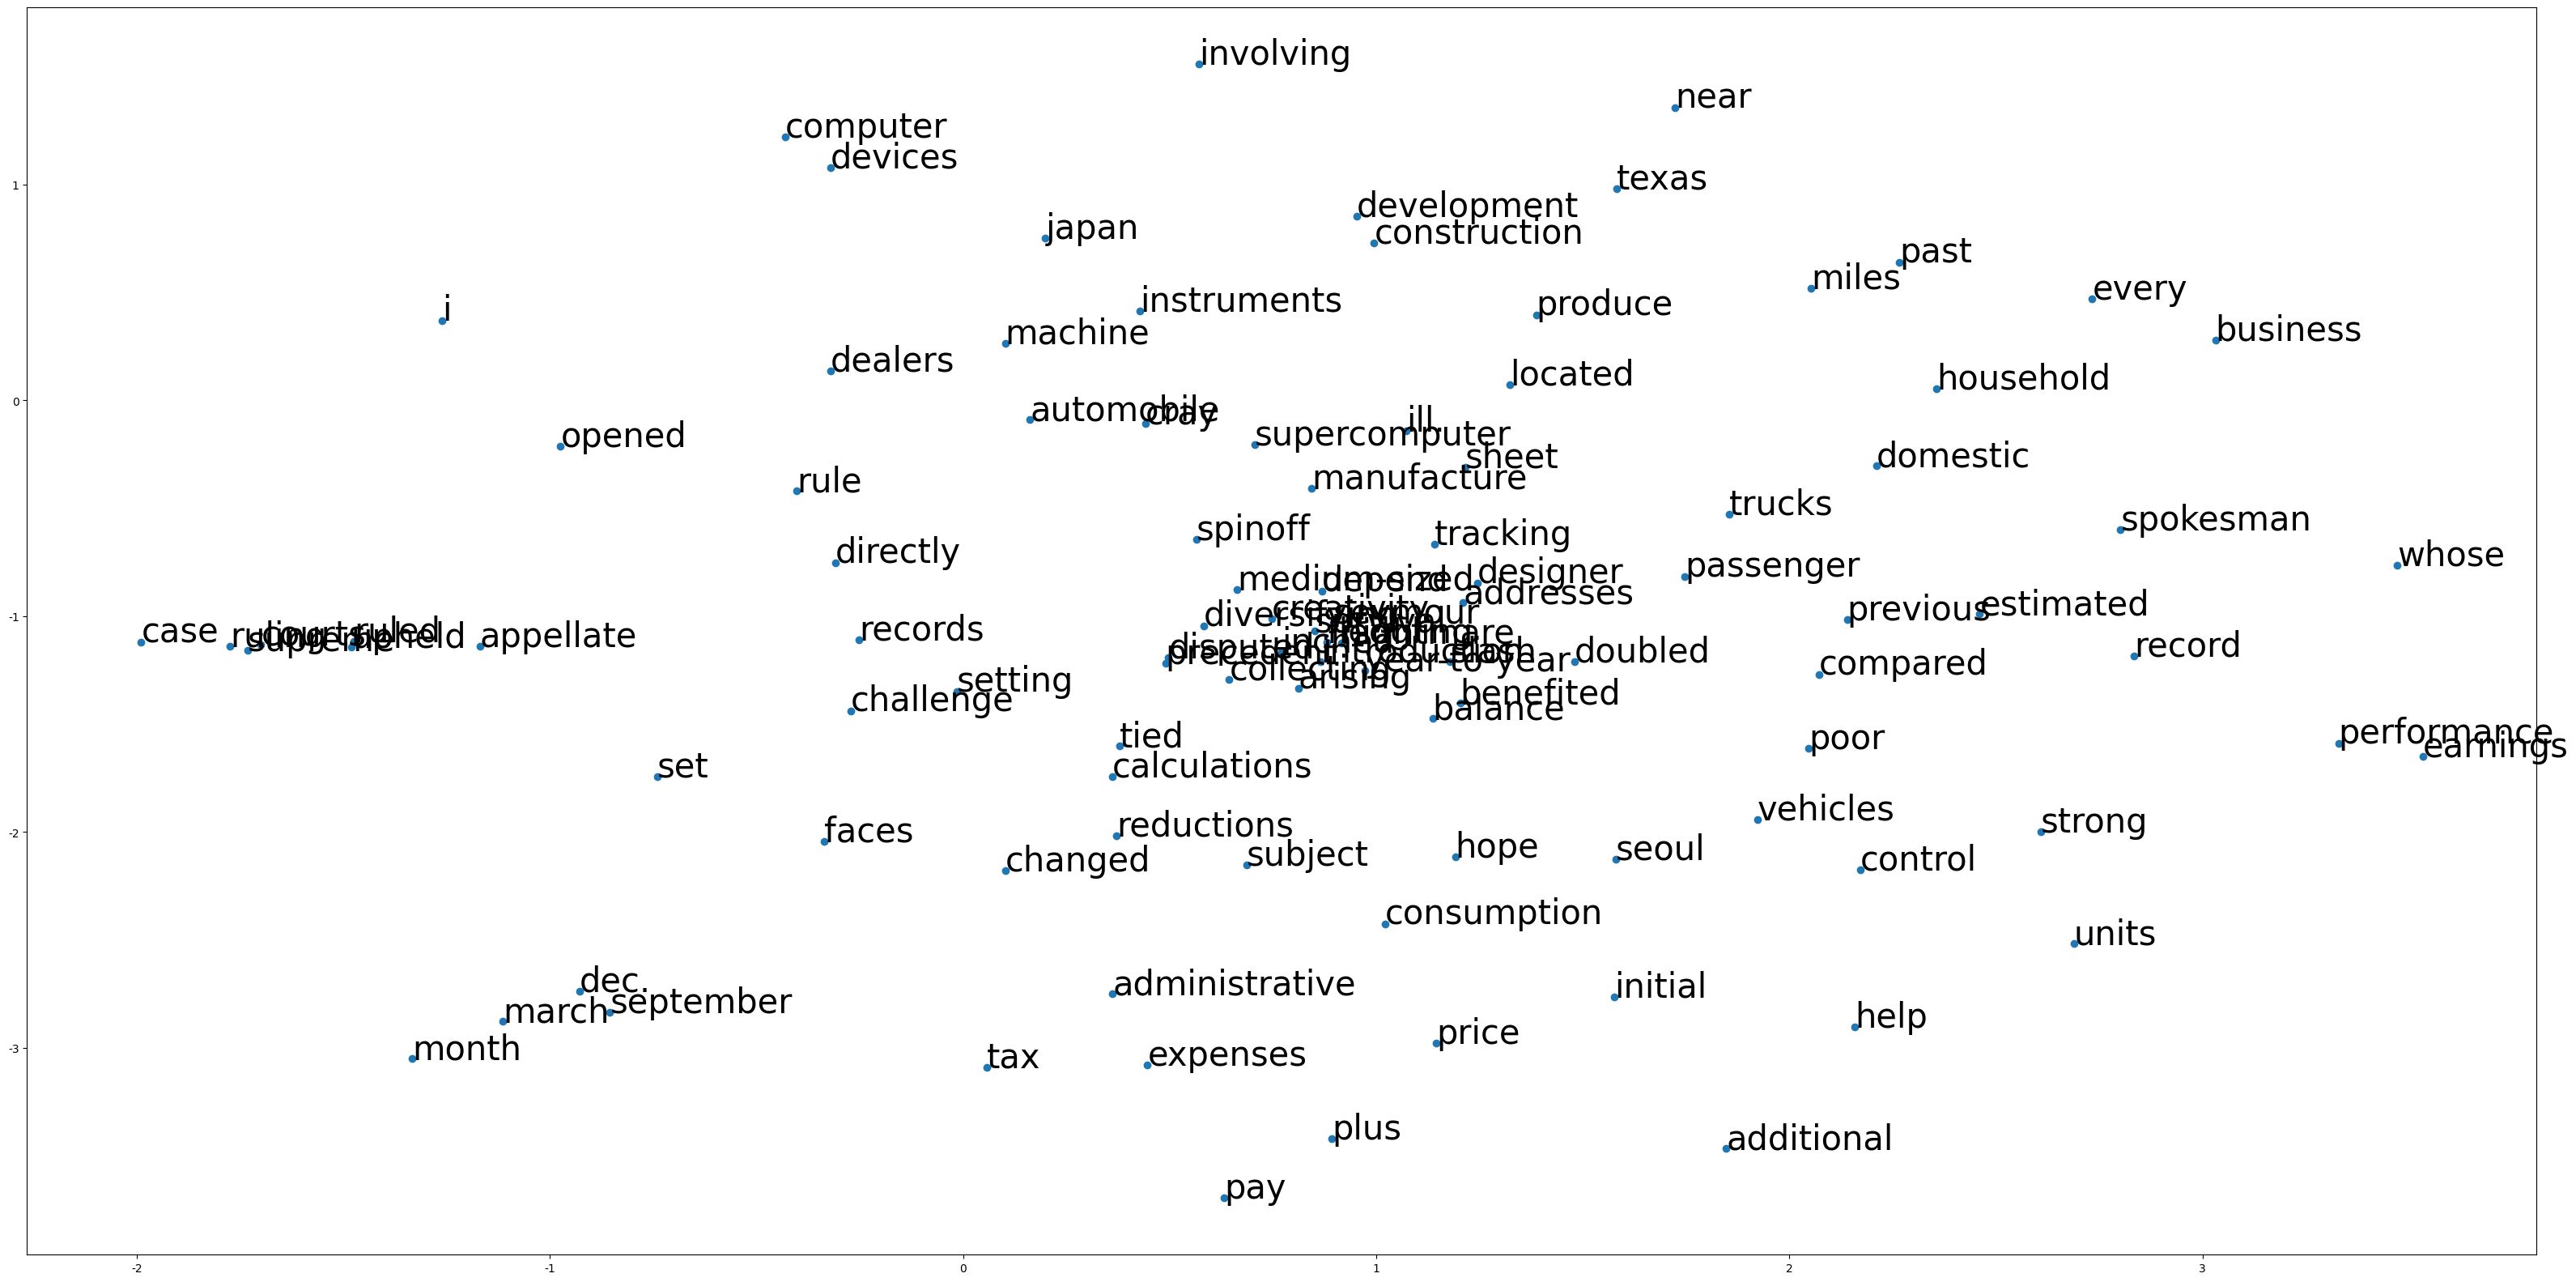

In [26]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()